## Import Necessary Libraries

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

## Read data from file

In [49]:
# Load the dataset
file_path = 'dataset/adult.csv'
data = pd.read_csv(file_path)

## Data Analysis
### Description of Data

In [50]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [51]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [53]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [54]:
data.sample(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
208,20,Private,107801,Assoc-acdm,12,Never-married,Other-service,Own-child,White,Female,0,2205,18,United-States,<=50K
1026,33,?,289046,HS-grad,9,Divorced,?,Not-in-family,Black,Male,0,1741,40,United-States,<=50K
24470,61,Private,101265,12th,8,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,40,Italy,<=50K
5654,26,Self-emp-not-inc,163189,HS-grad,9,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,<=50K
3902,34,Private,394447,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,2463,0,50,France,<=50K
22207,48,?,174533,11th,7,Separated,?,Unmarried,White,Male,0,0,40,United-States,<=50K
19762,49,Self-emp-inc,34998,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K
21738,64,Private,182979,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
4878,22,Private,223515,Bachelors,13,Never-married,Prof-specialty,Unmarried,White,Male,0,0,20,United-States,<=50K
18488,54,Self-emp-not-inc,154785,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,50,United-States,<=50K


<Axes: >

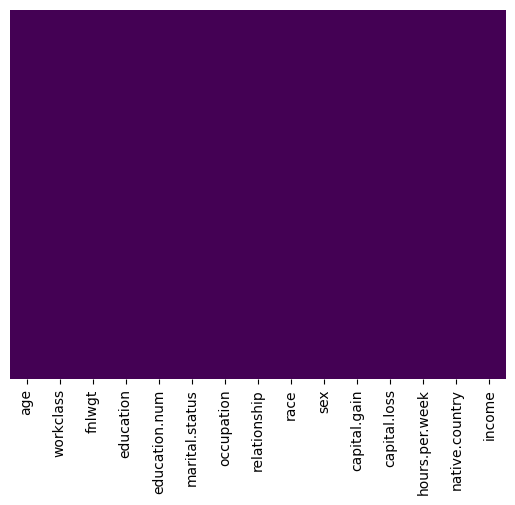

In [55]:
# visualize NAs in heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Cleaning and preprocessing data

In [56]:
# Replace "?" with NaN for easier handling
data.replace("?", pd.NA, inplace=True)

In [57]:
# Drop rows with missing values (alternative: impute values if necessary)
data.dropna(inplace=True)

In [58]:
# Encode categorical features and the target variable
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store label encoders for future decoding

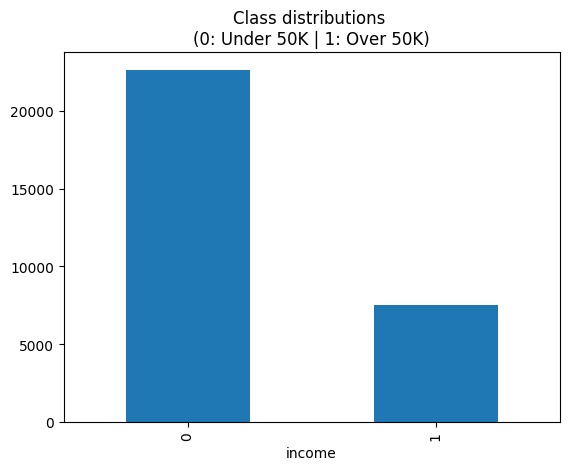

In [59]:
# Visualize target variable distribution
plot = data['income'].value_counts().plot(kind='bar', title="Class distributions \n(0: Under 50K | 1: Over 50K)")
fig = plot.get_figure()

In [60]:
# Separate features (X) and target variable (y)
X = data.drop('income', axis=1)
y = data['income']

In [61]:
# Normalize numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [63]:
# Output the shapes of the datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (21113, 14)
Testing features shape: (9049, 14)
Training labels shape: (21113,)
Testing labels shape: (9049,)


# Logistic Regression

In [64]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

In [65]:
# Train the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [66]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

In [67]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [68]:
# Print results
print("Logistic Regression Model Performance")
print("=====================================")
print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Logistic Regression Model Performance
Accuracy: 0.8299

Confusion Matrix:
[[6448  349]
 [1190 1062]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6797
           1       0.75      0.47      0.58      2252

    accuracy                           0.83      9049
   macro avg       0.80      0.71      0.74      9049
weighted avg       0.82      0.83      0.82      9049



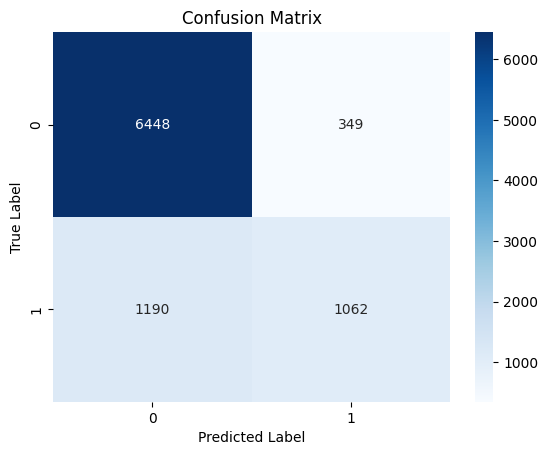

In [69]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Decision Tree

In [70]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

In [71]:
# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
# Make predictions on the test set
y_pred_tree = decision_tree_model.predict(X_test)

In [73]:
# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

In [74]:
# Print results
print("\nDecision Tree Model Performance")
print("================================")
print(f"Accuracy: {accuracy_tree:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_tree)
print("\nClassification Report:")
print(class_report_tree)


Decision Tree Model Performance
Accuracy: 0.8115

Confusion Matrix:
[[5916  881]
 [ 825 1427]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6797
           1       0.62      0.63      0.63      2252

    accuracy                           0.81      9049
   macro avg       0.75      0.75      0.75      9049
weighted avg       0.81      0.81      0.81      9049



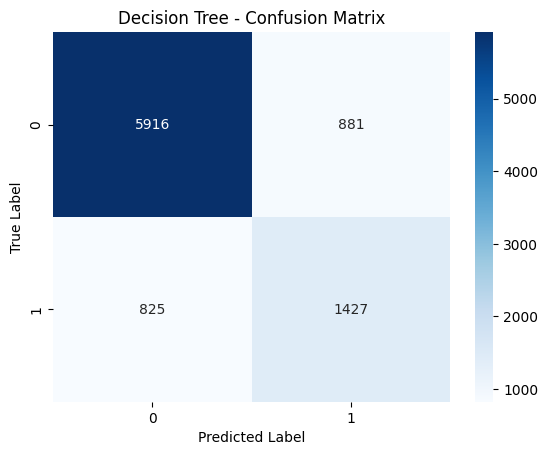

In [75]:
# Confusion Matrix
conf_matrix = sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Random Forest

In [76]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

In [77]:
# Train the model on the training data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
# Make predictions on the test set
y_pred_forest = random_forest_model.predict(X_test)

In [79]:
# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
class_report_forest = classification_report(y_test, y_pred_forest)

In [80]:
# Print results
print("\nRandom Forest Model Performance")
print("================================")
print(f"Accuracy: {accuracy_forest:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_forest)
print("\nClassification Report:")
print(class_report_forest)


Random Forest Model Performance
Accuracy: 0.8597

Confusion Matrix:
[[6349  448]
 [ 822 1430]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6797
           1       0.76      0.63      0.69      2252

    accuracy                           0.86      9049
   macro avg       0.82      0.78      0.80      9049
weighted avg       0.85      0.86      0.86      9049



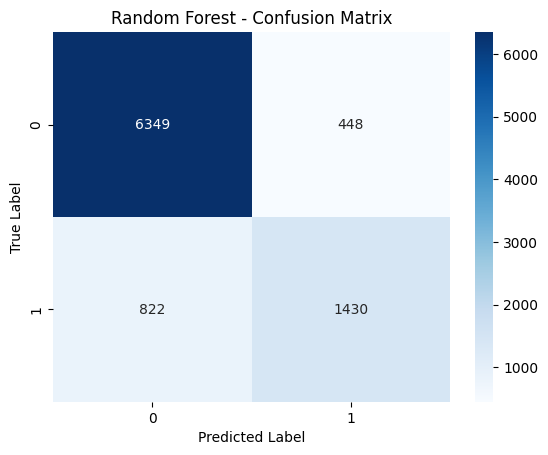

In [81]:
# Confusion Matrix
conf_matrix = sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Support Vector Machine(SVM) model

In [82]:
# Initialize the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)

In [83]:
# Train the model on the training data
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [84]:
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

In [85]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

In [86]:
# Print results
print("\nSupport Vector Machine Model Performance")
print("=========================================")
print(f"Accuracy: {accuracy_svm:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(class_report_svm)


Support Vector Machine Model Performance
Accuracy: 0.8097

Confusion Matrix:
[[6628  169]
 [1553  699]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6797
           1       0.81      0.31      0.45      2252

    accuracy                           0.81      9049
   macro avg       0.81      0.64      0.67      9049
weighted avg       0.81      0.81      0.78      9049



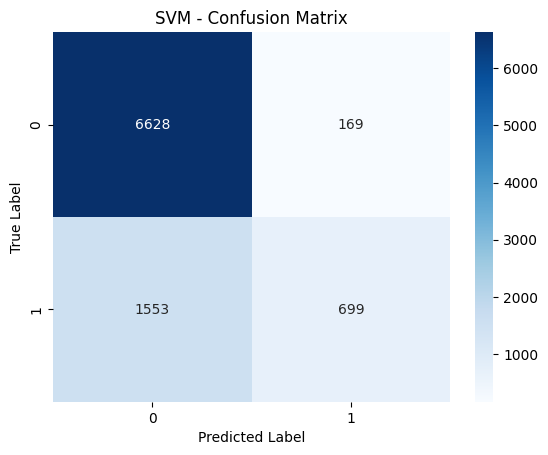

In [87]:
# Confusion Matrix
conf_matrix = sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Evaluation
## Compare the performance of the algorithms

In [88]:
# Dictionary to store evaluation metrics
performance_metrics = {}

In [89]:
# Function to calculate metrics
def evaluate_model(name, y_test, y_pred, y_pred_proba=None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1]) if y_pred_proba is not None else None

    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc
    }

In [90]:
# Logistic Regression
y_pred_log = logistic_model.predict(X_test)
y_pred_proba_log = logistic_model.predict_proba(X_test)
evaluate_model('Logistic Regression', y_test, y_pred_log, y_pred_proba_log)

# Decision Tree
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_proba_tree = decision_tree_model.predict_proba(X_test)
evaluate_model('Decision Tree', y_test, y_pred_tree, y_pred_proba_tree)

# Random Forest
y_pred_forest = random_forest_model.predict(X_test)
y_pred_proba_forest = random_forest_model.predict_proba(X_test)
evaluate_model('Random Forest', y_test, y_pred_forest, y_pred_proba_forest)

# SVM (no probability estimates by default for linear kernel; use decision_function instead)
y_pred_svm = svm_model.predict(X_test)
y_decision_svm = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_decision_svm)
auc_svm = roc_auc_score(y_test, y_decision_svm)

# Manually add SVM metrics
performance_metrics['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'AUC-ROC': auc_svm
}

In [91]:
# Display the results
performance_df = pd.DataFrame(performance_metrics).T
print("\nComparison of Model Performance Metrics:")
print(performance_df)


Comparison of Model Performance Metrics:
                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.829926   0.752658  0.471581  0.579853  0.861148
Decision Tree        0.811471   0.618284  0.633659  0.625877  0.752021
Random Forest        0.859653   0.761448  0.634991  0.692494  0.909121
SVM                  0.809703   0.805300  0.310391  0.448077  0.851633


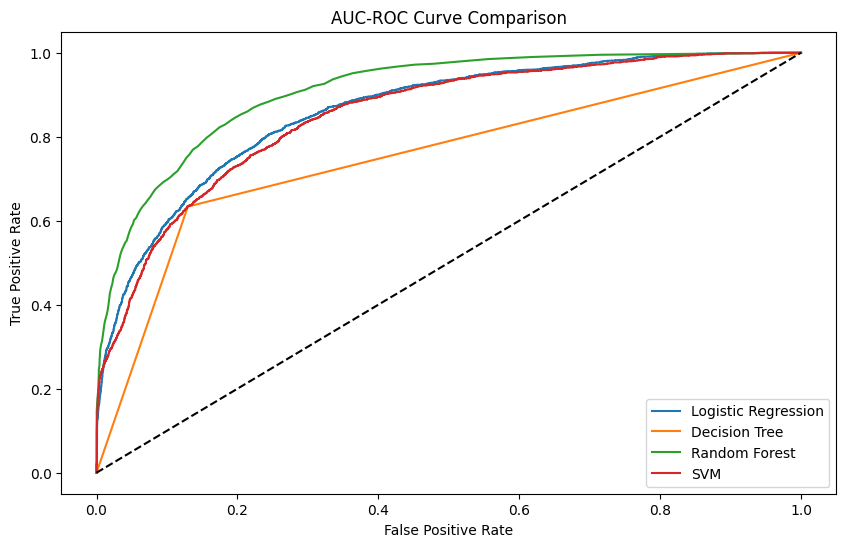

In [92]:
# Plot AUC-ROC Curves
plt.figure(figsize=(10, 6))
for model_name, (fpr, tpr, _) in [
    ('Logistic Regression', roc_curve(y_test, y_pred_proba_log[:, 1])),
    ('Decision Tree', roc_curve(y_test, y_pred_proba_tree[:, 1])),
    ('Random Forest', roc_curve(y_test, y_pred_proba_forest[:, 1])),
    ('SVM', (fpr, tpr, None)),
]:
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.title('AUC-ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Importance of features
##### Imaportance of each features with respect to each algorithm

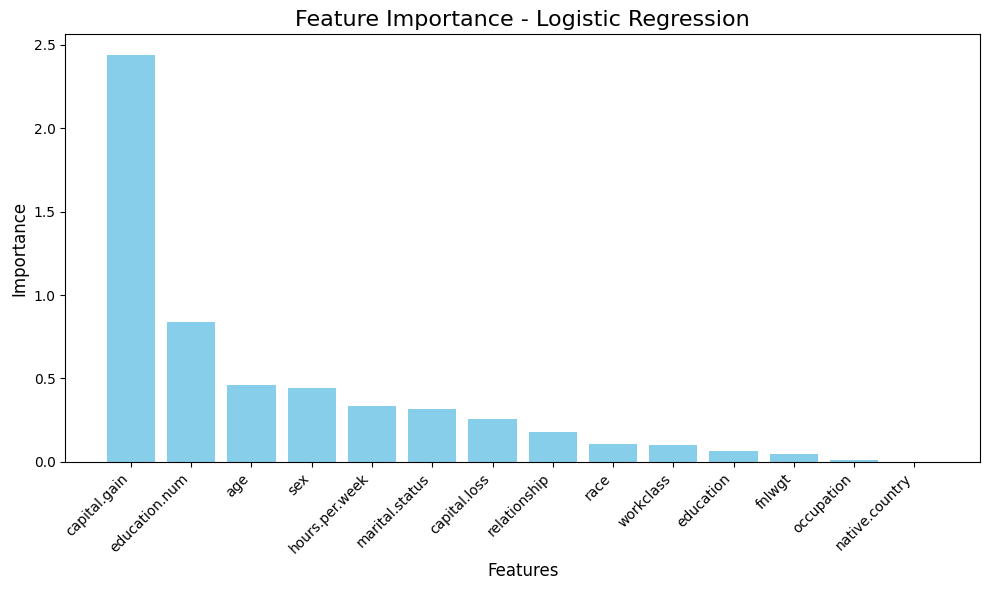

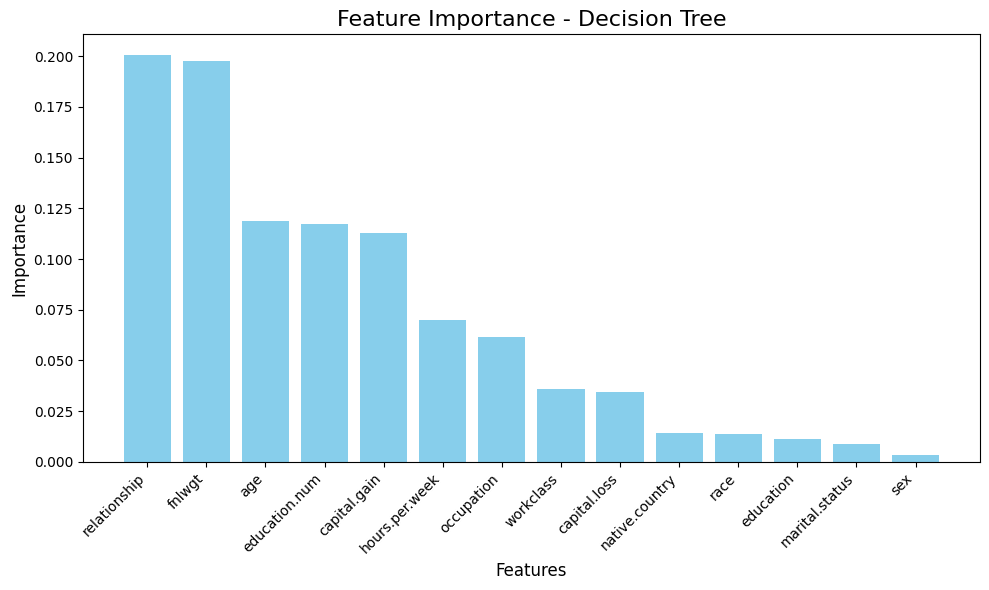

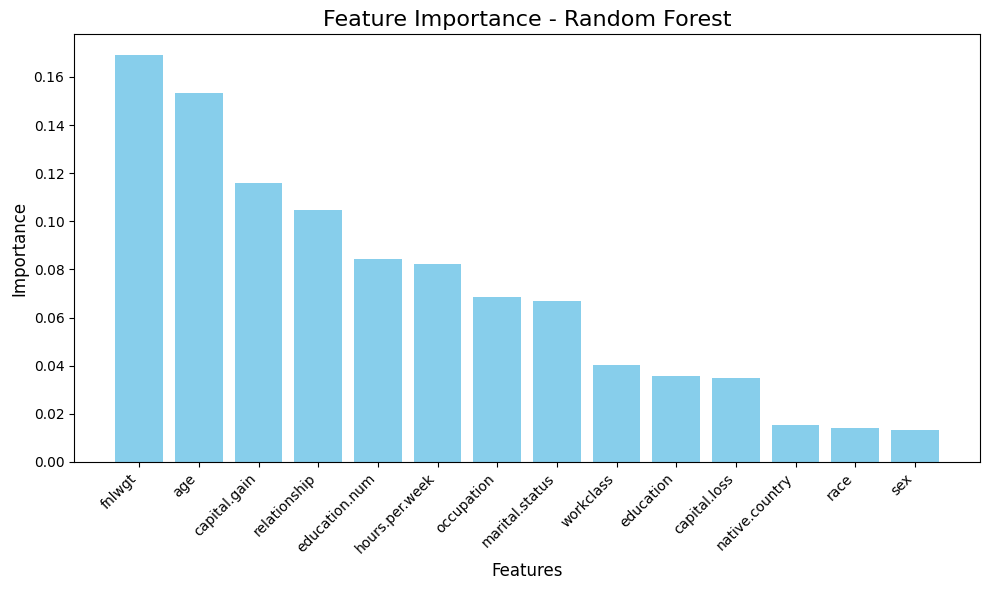

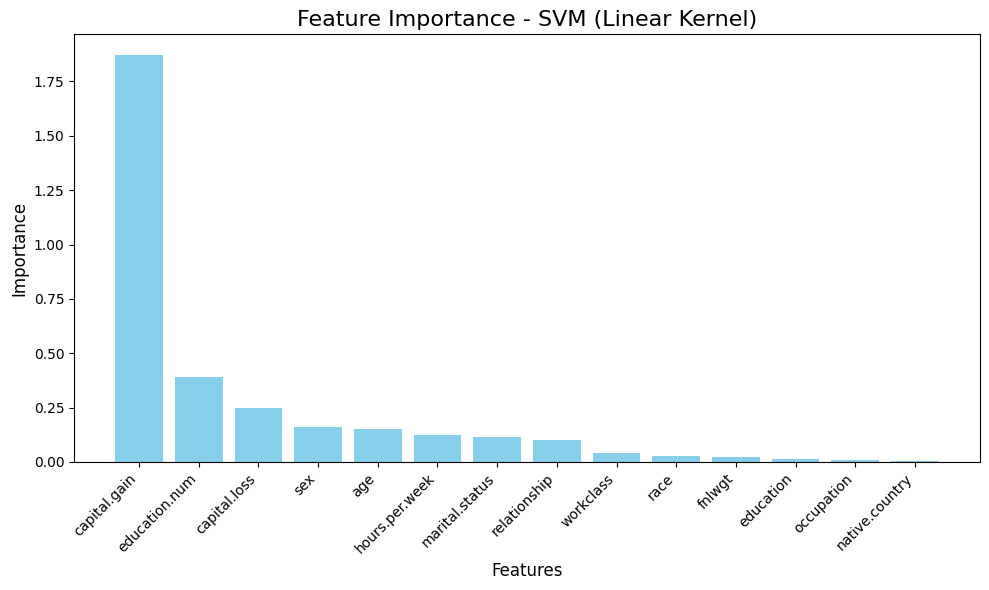

In [93]:
# Feature names
feature_names = X.columns

# Function to plot feature importance
def plot_feature_importance(importances, model_name):
    indices = np.argsort(importances)[::-1]  # Sort in descending order
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances[indices], align='center', color='skyblue')
    plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right', fontsize=10)
    plt.title(f"Feature Importance - {model_name}", fontsize=16)
    plt.xlabel("Features", fontsize=12)
    plt.ylabel("Importance", fontsize=12)
    plt.tight_layout()
    plt.show()

# Logistic Regression (importance derived from coefficients)
logistic_importance = np.abs(logistic_model.coef_[0])  # Absolute value of coefficients
plot_feature_importance(logistic_importance, "Logistic Regression")

# Decision Tree (importance derived from tree-based importance)
tree_importance = decision_tree_model.feature_importances_
plot_feature_importance(tree_importance, "Decision Tree")

# Random Forest (importance derived from tree-based importance across all trees)
forest_importance = random_forest_model.feature_importances_
plot_feature_importance(forest_importance, "Random Forest")

# SVM with Linear Kernel (importance derived from coefficients)
if hasattr(svm_model, 'coef_'):  # Linear kernel SVM has coef_ attribute
    svm_importance = np.abs(svm_model.coef_[0])  # Absolute value of coefficients
    plot_feature_importance(svm_importance, "SVM (Linear Kernel)")
else:
    print("Feature importance for SVM is not available for non-linear kernels.")